In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
cancer = pd.read_csv('/content/breast cancer classification dataset.csv')
cancer.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,NaN,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  9
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      8
Unnamed:

In [ ]:
# Null values deal
print("Shape of dataset before droppping:",cancer.shape)

from sklearn.impute import SimpleImputer                                             # impute

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(cancer[['radius_mean']])

cancer['radius_mean'] = impute.transform(cancer[['radius_mean']])

                                                                                     # row Drop
cancer= cancer.dropna(axis=0,subset=['fractal_dimension_worst'])
#cancer = cancer.loc[:, ~cancer.columns.str.contains('^Unnamed')]                     # Unnamed column drop
cancer= cancer.dropna(axis=1)

print("Shape after dropping: ", cancer.shape)

Shape of dataset before droppping: (569, 33)
Shape after dropping:  (561, 32)


In [ ]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder                                       #Label encoding
enc = LabelEncoder()                                                                            
cancer.iloc[:,1] = enc.fit_transform(cancer.iloc[:,1].values)

In [ ]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,14.091502,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,84300903,1,19.690000,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.420000,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.290000,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.450000,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
#Split dataframe into X and Y
X = cancer.iloc[:,2:31].values                         #Features

Y = cancer.iloc[:,1].values                            #Cancer y/n?

In [ ]:
# train-test split = 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state=0)

In [ ]:
#Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Function
def models(X_train, Y_train):

  #Support Vector Machine
  from sklearn.svm import SVC
  svc = SVC(kernel="linear")
  svc.fit(X_train, Y_train)

  #Neural Network
  from sklearn.neural_network import MLPClassifier
  nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
  nnc.fit(X_train, Y_train)

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  rfc = RandomForestClassifier(n_estimators=50)
  rfc.fit(X_train, Y_train)

  print('[0]Support Vector Machine Training Accuracy:', svc.score(X_train, Y_train))
  print('[0]Support Vector Machine Testing Accuracy:', svc.score(X_test, Y_test))
  print()
  print('[1]Neural Network Classifier Training Accuracy:', nnc.score(X_train, Y_train))
  print('[1]Neural Network Classifier Testing Accuracy:', nnc.score(X_test, Y_test))
  print()
  print('[2]Random Forest Classifier Training Accuracy:', rfc.score(X_train, Y_train))
  print('[2]Random Forest Classifier Testing Accuracy:', rfc.score(X_test, Y_test))

  return svc, nnc, rfc

# Pre- PCA

In [ ]:
# Pre-PCA Accuracy
print('Pre-PCA accuracy: ')
print()
pre_pca = models(X_train, Y_train)

Pre-PCA accuracy: 

[0]Support Vector Machine Training Accuracy: 0.9933035714285714
[0]Support Vector Machine Testing Accuracy: 0.9557522123893806

[1]Neural Network Classifier Training Accuracy: 0.9933035714285714
[1]Neural Network Classifier Testing Accuracy: 0.9469026548672567

[2]Random Forest Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Testing Accuracy: 0.9646017699115044


In [ ]:
cancer.shape

(561, 32)

In [ ]:
cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,14.091502,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
2,84300903,1,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.420000,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.450000,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.250000,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.710000,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.000000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.460000,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
10,845636,1,16.020000,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [ ]:
#PCA
cancer_mod=cancer     #modification
cancer_mod=cancer_mod.drop(["id", "diagnosis"], axis=1) #dropping the columns
from sklearn.decomposition import PCA
pca = PCA(n_components=16)

cancer_pca= pca.fit_transform(cancer_mod)

# Post- PCA

In [ ]:
cancer_pca.shape

(561, 16)

In [ ]:
pca_names=["pca_"+str(i) for i in range(1,17)]                        #if have 16 columns I would like to name them pca_1, pca_2 and so on
df_afterpca = pd.DataFrame(data=cancer_pca, columns=pca_names)       #here pca is the 16 dimension feature data that I created
df_afterpca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16
0,1166.085356,-293.374471,47.993609,-8.716282,31.813313,1.931331,0.710253,2.973932,1.732600,0.245634,0.669951,-0.282428,-0.031660,0.044472,0.026358,-0.016817
1,1001.608432,39.672448,-2.219198,4.305127,-0.538480,-2.688830,-0.744622,-0.179299,0.188544,-0.256286,-0.122815,0.249563,-0.098890,0.018853,-0.020636,0.022908
2,-401.320092,-67.393211,8.655304,-11.826121,7.062242,1.315295,-1.259817,0.035838,0.113722,-0.546956,0.046307,0.757019,-0.351464,0.054897,0.048802,0.049998
3,936.100656,189.832909,0.892060,8.532976,7.563496,0.978154,-0.318011,0.000343,-0.340783,0.010262,-0.140799,0.006125,0.084643,0.027850,-0.044519,-0.005836
4,-205.730450,-79.815665,-1.558375,-2.934431,7.601008,0.750230,1.179854,-0.087069,0.398586,0.026791,0.061207,0.273560,-0.060482,0.000723,-0.009949,0.021336


In [ ]:
df_afterpca["label"]=cancer["diagnosis"]
df_afterpca.dropna(inplace=True)
lb=LabelEncoder()
df_afterpca["label"]=lb.fit_transform(df_afterpca["label"])
df_afterpca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,label
0,1166.085356,-293.374471,47.993609,-8.716282,31.813313,1.931331,0.710253,2.973932,1.732600,0.245634,0.669951,-0.282428,-0.031660,0.044472,0.026358,-0.016817,1
2,-401.320092,-67.393211,8.655304,-11.826121,7.062242,1.315295,-1.259817,0.035838,0.113722,-0.546956,0.046307,0.757019,-0.351464,0.054897,0.048802,0.049998,1
3,936.100656,189.832909,0.892060,8.532976,7.563496,0.978154,-0.318011,0.000343,-0.340783,0.010262,-0.140799,0.006125,0.084643,0.027850,-0.044519,-0.005836,1
4,-205.730450,-79.815665,-1.558375,-2.934431,7.601008,0.750230,1.179854,-0.087069,0.398586,0.026791,0.061207,0.273560,-0.060482,0.000723,-0.009949,0.021336,1
5,827.047152,-46.698446,-32.711383,0.418967,3.046610,1.455974,-0.365154,-0.515728,0.048614,-0.075438,0.260678,-0.094340,0.051899,0.030061,0.004970,0.027232,1


In [ ]:
#Split dataframe into x and y
x = df_afterpca.drop("label", axis=1)                         #Features

y = df_afterpca["label"]                         #Cancer y/n?
# train-test split = 80:20
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=0)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(443, 16) (111, 16) (443,) (111,)


In [ ]:
# Post-PCA accuracy
print('Post PCA accuracy: ')
print()
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
print('[0]Support Vector Machine Training Accuracy:', svc.score(x_train, y_train))
print('[0]Support Vector Machine Testing Accuracy:', svc.score(x_test, y_test))


In [ ]:
from sklearn.neural_network import MLPClassifier

nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)

print('[1]Neural Network Classifier Training Accuracy:', nnc.score(x_train, y_train))
print('[1]Neural Network Classifier Testing Accuracy:', nnc.score(x_test, y_test))

[1]Neural Network Classifier Training Accuracy: 0.6591422121896162
[1]Neural Network Classifier Testing Accuracy: 0.5765765765765766


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
print('[2]Random Forest Classifier Training Accuracy:', rfc.score(x_train, y_train))
print('[2]Random Forest Classifier Testing Accuracy:', rfc.score(x_test, y_test))

[2]Random Forest Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Testing Accuracy: 0.5765765765765766


In [ ]:
post_pca=[]
post_pca.append(svc)
post_pca.append(nnc)
post_pca.append(rfc)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, post_pca[0].predict(x_test)))

0.6216216216216216


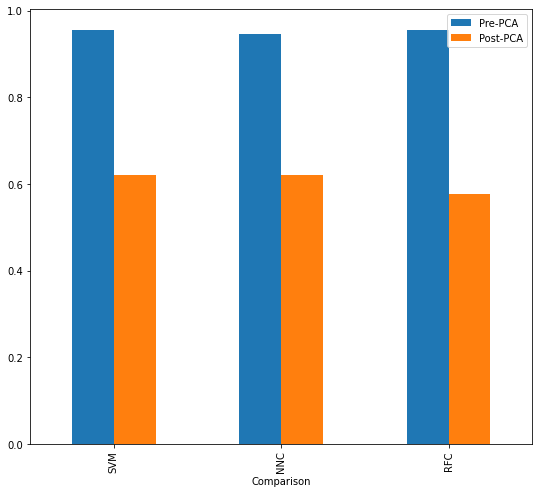

In [ ]:
from sklearn.metrics import accuracy_score

a1= accuracy_score(Y_test, pre_pca[0].predict(X_test))
b1= accuracy_score(Y_test, pre_pca[1].predict(X_test))
c1= accuracy_score(Y_test, pre_pca[2].predict(X_test))
pre_pca = [a1, b1, c1]

a2= accuracy_score(y_test, post_pca[0].predict(x_test))
b2= accuracy_score(y_test, post_pca[1].predict(x_test))
c2= accuracy_score(y_test, post_pca[2].predict(x_test))
post_pca = [a2, b2, c2]

data=[["SVM",a1,a2],
      ["NNC",b1,b2],
      ["RFC",c1,c2]
     ]

df=pd.DataFrame(data,columns=["Comparison","Pre-PCA","Post-PCA"])
df.plot(x="Comparison", y=["Pre-PCA","Post-PCA"], kind="bar",figsize=(9,8))
plt.show()